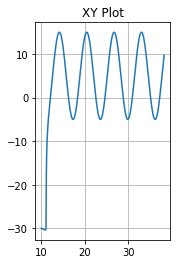

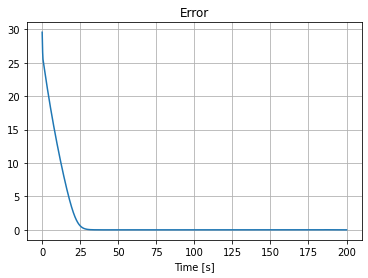

In [6]:
# Follow a straight line

import matplotlib.pyplot as pl
import numpy as np
from numpy import linalg as la

# implicit equation of the straight line f(x,y) := ax + by + c = 0 ; y = (-ax -c)/b

# A * sin(wx) + c - y = 0

A = 10
w = 1
c = 5

a = 5
b = 2
c = 5

r = 10
xc = -10
yc = 40

# Times for the simulation
tf = 200 # secs
dt = 0.005
dt_inv = 1.0/dt # Sampling frequency in sec^-1

# Initial position of the robot
p = np.array([10, -30]) # x, y initial positions

Rot90 = np.array([[0, -1],[1, 0]]) # rotation matrix
ke = 0.05 # gain, how aggressive is the following

# logs
log_time = np.linspace(0, tf, int(tf*dt_inv))
log_p = np.zeros((2, np.size(log_time)))
log_e = np.zeros(np.size(log_time))


for i in range(np.size(log_time)):
    # log the data
    log_p[:, i] = p

    # error or level set
    # e = a*p[0] + b*p[1] + c
    # e = (p[0]-xc)**2 + (p[1]-yc)**2 - r**2
    e = A * np.sin(w * p[0]) + c - p[1]
    # Jacobian or normal vector
    n = 2*np.array([A*w*np.cos(w*p[0]), -1])
    n = n / la.norm(n)
    # Tangent vector
    t = Rot90.dot(n)
    
    direction_to_follow = t - ke*e*n
    #direction_to_follow = direction_to_follow / la.norm(direction_to_follow)

    # Simulation
    p = p + direction_to_follow*dt

    # log the data
    log_e[i] = e

# XY Plots
fig, axis = pl.subplots(1)
axis.set_title("XY Plot")

# Plot the Guiding Vector Field
#X_gvf, Y_gvf = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
#e_gvf = a*X_gvf + b*Y_gvf + c
#e_gvf = (X_gvf-xc)**2 + (Y_gvf-yc)**2 + r**2
#n_gvf = 2*np.array([X_gvf-xc,Y_gvf-yc])
#n_gvf = n_gvf / la.norm(n_gvf) # normalize, unit vector
#t_gvf = Rot90.dot(n_gvf)
#U_gvf = t_gvf[0] - ke*e_gvf*n_gvf[0]
#V_gvf = t_gvf[1] - ke*e_gvf*n_gvf[1]
#axis.quiver(X_gvf, Y_gvf, U_gvf, V_gvf)

# Plot the path
#x_path = np.linspace(-100,100,100)
#y_path = (-c -a*x_path)/b
#axis.plot(x_path, y_path, 'k--')

# Plot the robot's trajectory
axis.plot(log_p[0, :], log_p[1, :])
axis.grid()
axis.set_aspect('equal')

# Error signal
fig, axis = pl.subplots(1)
axis.set_title("Error")
axis.plot(log_time[:], log_e)
axis.set_xlabel("Time [s]")
axis.grid()

pl.show()

# Assignment 22th of March

Modify the code above to guide a robot to a circle of radius 10, and center [-10, 40].

Extend the code above to guide a robot between two circles of radius 10 and centers separated by 50. Once the robot makes half circle, then it jumps to the other one over and over again.

In [78]:
print(direction_to_follow)

[-3.e-323  4.e-323]
